## Analyze the company's sales

### Cleaning and Preparing Data

<b>Table of Content</b>
* [Import Modules](#Import-Modules)<br>
* [Define Functions](#Define-Functions)<br>
* [Data Cleaning](#Data-Cleaning)<br>
    * [Missing Attributes](#Missing-Attributes-Check)<br>
    * [Lexical Errors](#Lexical-Check)<br>
    * [Irregularity Errors](#Irregularity-Check)<br>
    * [Formatting Errors](#Formatting-Check)<br>
    * [Duplication Errors and Contradictions](#Duplication-Errors-and-Contradictions)<br>
    * [Outliers](#Outliers-Check)<br>
* [Merge Files](#Merge-the-Files)<br>



***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from datetime import datetime, date, timezone

### Define Functions

In [3]:
class Thresholds:
    float_conversion_threshold=20
    string_conversion_threshold=20
    datetime_conversion_threshold=20

    
def conv_date(indate):
    return datetime.strptime(indate[:-3],'%Y-%m-%d %H:%M:%S.%f').date()


def float_conversion(inObj):
    strObj = str(inObj)
    try:
        return float(strObj)
    except ValueError:
        Thresholds.float_conversion_threshold1-=1
        if Thresholds.float_conversion_threshold1>0:
            print("Error converting value '{0}' to float ({1})".format(inobj,Thresholds.float_conversion_threshold1))
        return inObj


def string_conversion(inObj2):
    strObj2 = str(inObj2)
    if isinstance(inObj2, str):
        return strObj2
    else:
        Thresholds.string_conversion_threshold-=1
        if Thresholds.string_conversion_threshold>0:
            print("Error converting value '{0}' to string ({1})".format(inObj2,Thresholds.string_conversion_threshold))
        return inObj2


def datetime_conversion(inObj3):
    if isinstance(inObj3, datetime):
        return inObj3
    elif isinstance(inObj3, str):
        try:
            return datetime.strptime(inObj3,"%Y-%m-%d %H:%M:%S.%f")
        except ValueError:
            Thresholds.datetime_conversion_threshold-=1
            if Thresholds.datetime_conversion_threshold>0:
                print("Exception while converting value '{0}' to date (from %Y-%m-%d %H:%M:%S.%f) ({1})".format(inObj3,Thresholds.datetime_conversion_threshold))
            return inObj3
    else:
        Thresholds.datetime_conversion_threshold-=1
        if Thresholds.datetime_conversion_threshold>0:
            print("Not possible converting value '{0}' to date ({1})".format(inObj3,Thresholds.datetime_conversion_threshold))
        return inObj3
    
    

***

Load all files

In [4]:
csm = pd.read_csv("customers.csv")
prd = pd.read_csv("products.csv")
trs = pd.read_csv("transactions.csv", parse_dates=[0])

***


### Data Cleaning
In each of the files we have loaded, we will now conduct basic data disovery. Here is a summary of what we have found. We focus on the following type of issues and problems:

1. Missing Attributes - Look for missing values or null values [Jump](#Missing-Attributes-Check)<br>
2. Lexical Errors - Does any value's formatting deviate from the rest in the column? [Jump](#Lexical-Check)<br>
3. Irregularity Errors - Does any value seem to have the right format, but the wrong content? [Jump](#Irregularity-Check)<br>
4. Formatting Errors - Check for comma separated values [Jump](#Formatting-Check)<br>
5. Duplication Errors - Look for clear dupes and dupe suspects [Jump](#Duplication-Errors-and-Contradictions)<br>
6. Contradition Errors - Data not making sense [Jump](#Duplication-Errors-and-Contradictions)<br>
7. Outliers - Check values or bins of values and their range occurances [Jump](#Outliers-Check)<br>




##### Missing Attributes Check

Investigate if the cells contain the right kind of values

In [6]:
# Missing Attribute Check (NaN values in our case)

print("===  Get Info For transactions.csv ==============\n")
trs.info()
print("\nWe find no null values and that every attribute is a string")
print("\n===  Check NaN =================================\n\n{0}\n".format(trs.isna().sum()))
print("Another method to check for null values split by attribute")
print("\n=== Check Empty ==============================\n\nEmpty Values: {0}".format(len(np.where(trs.applymap(lambda x: x ==''))[0])))
print("Since the whole table is made of strings, we can count all empty ones (diff from NaN) but we don't find any")
print("\n==============================================")
trs.head(5)

===  Get Info For transactions.csv ==============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB

We find no null values and that every attribute is a string

===  Check NaN =================================

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

Another method to check for null values split by attribute

=== Check Empty ==============================

Empty Values: 0
Since the whole table is made of strings, we can count all empty ones (diff from NaN) but we don't find any



,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [7]:
print("===  Get Info For products.csv ======\n")
prd.info()
print("\n===  Check NaN ===========================\n\n{0}\n".format(prd.isna().sum()))
print("\n=== Check Empty ==========================\n\nEmpty Values: {0}".format(len(np.where(prd.applymap(lambda x: x ==''))[0])))
print("\n==========================================")
prd.head(5)

===  Get Info For products.csv ======

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB

===  Check NaN ===========================

id_prod    0
price      0
categ      0
dtype: int64


=== Check Empty ==========================

Empty Values: 0



,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [8]:
print("===  Get Info For customers.csv ======\n")
csm.info()
print("\n===  Check NaN ===========================\n\n{0}\n".format(csm.isna().sum()))
print("\n=== Check Empty ==========================\n\nEmpty Values: {0}".format(len(np.where(csm.applymap(lambda x: x ==''))[0])))
print("\n==========================================")
csm.head(5)

===  Get Info For customers.csv ======

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB

===  Check NaN ===========================

client_id    0
sex          0
birth        0
dtype: int64


=== Check Empty ==========================

Empty Values: 0



,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


<div class="alert alert-block alert-success">
<b>Results for Missing Attributes Check</b><br> First step shows us that all three tables are intact in terms of NaN and empty values
</div>



##### Lexical Check 

Investigate if the cells contain the right kind of values

In [9]:
print("Sorted list of session_id: {0}".format(trs.sort_values(by='session_id')['session_id'].unique())) 
print("Result: Nothing noteworthy other than s_0\n")

print("Sorted list of client_id: {0}".format(csm.sort_values(by='client_id')['client_id'].unique()))
print("Result: We find some values c_* and some as ct_*\n")

print("Sorted list of id_prod: {0}".format(prd.sort_values(by='id_prod')['id_prod'].unique()))
print("Result: We are interested in the name anomaly T_0")

Sorted list of session_id: ['s_0' 's_1' 's_10' ... 's_99996' 's_99997' 's_99998']
Result: Nothing noteworthy other than s_0

Sorted list of client_id: ['c_1' 'c_10' 'c_100' ... 'c_999' 'ct_0' 'ct_1']
Result: We find some values c_* and some as ct_*

Sorted list of id_prod: ['0_0' '0_1' '0_10' ... '2_98' '2_99' 'T_0']
Result: We are interested in the name anomaly T_0


From these results we want to round up and look at the following attributes

- Variable session_id has a s_0 that should be looked at
- Variable client_id has a c_1 value and some ct_* values that should be looked at
- Variable id_prod has a 0_0 and T_0 values that should be looked at


We have found 200 anomalies (entries) around variable values 'id_prod'=T_0, 'session_id'=s_0 and client_id=ct_*
<br>
Lets list them

In [10]:
trs.loc[(trs['id_prod']=='T_0') | (trs['session_id']=='s_0') | (trs['client_id'].str.contains('ct_'))]

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


The cleanup of these 200 rows fixes all lexical errors we encountered. The easiest indicator of this problem is the string "test_" in the datetime column, so we focus on those when we delete those rows from the transaction table.

In [11]:
# Clean up transaction table 'trs'
print("Before removal: {0} rows".format(len(trs)))
trs=trs[~trs["date"].str.contains('test_', na=False)].reset_index() ### Removal of 200 test orders
print("After removal: {0} rows".format(len(trs)))

Before removal: 337016 rows
After removal: 336816 rows


In [12]:
# Clean up customer table 'csm'
print("Before removal: {0} rows".format(len(csm)))
csm=csm[~csm["client_id"].str.contains('ct_', na=False)].reset_index() ### Removal of 200 test orders
print("After removal: {0} rows".format(len(csm)))

Before removal: 8623 rows
After removal: 8621 rows


In [13]:
# Clean up prodcut table 'prd'
print("Before removal: {0} rows".format(len(prd)))
prd=prd[~prd["id_prod"].str.contains('T_', na=False)].reset_index() ### Removal of 200 test orders
print("After removal: {0} rows".format(len(prd)))

Before removal: 3287 rows
After removal: 3286 rows


<div class="alert alert-block alert-success">
<b>Result for Lexical Error Check</b><br> From our three tables we remove 200 test orders from the transaction table, we remove 2 clients from the customer table and 1 product from the product table.
</div>


##### Irregularity Check

Step three is to look for irregularity errors. However in the last where we looked for lexical errors, we stumbled upon a badly formated date field. Since we already fixed that by deleting the test orders, we can jump straight to the conclusion


<div class="alert alert-block alert-success">
<b>Result for Irregularity Error Check</b><br> The transaction table contained 200 test orders with badly formated dates (test_2021-03-01 02:30:02.237446), they have now been removed


##### Formatting Check

Step four is to search for formatting errors, for example comma separated lists instad of single values in any of the string attributes


In [14]:
print("\n=== Commas in Transactions table ==========================\n\n{0}".format((trs[['id_prod','date','session_id','client_id']].apply(lambda x: x.str.contains(','))).sum() ))
print("\n=== Commas in Customers table ==========================\n\n{0}".format((csm[['client_id','sex']].apply(lambda x: x.str.contains(','))).sum() ))
print("\n=== Commas in Products table ==========================\n\n{0}\n".format((prd[['id_prod']].apply(lambda x: x.str.contains(','))).sum() ))



=== Commas in Transactions table ==========================

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

=== Commas in Customers table ==========================

client_id    0
sex          0
dtype: int64

=== Commas in Products table ==========================

id_prod    0
dtype: int64



<div class="alert alert-block alert-success">
<b>Result for Formatting Error Check</b><br> No formatting errors found in the shape of comma separated lists


##### Duplication Errors and Contradictions

The fifth and sixth type of error check is not conducted in great detail here. We will check for duplicates and the extreme values based on our knowledge of the tables so far

In [ ]:
# Transaction Table
print("In the transaction table we expect the field id_prod to contain dupes, same with client_id. Here we take the oportunity to learn that we have many session_id")
print("\nHighest duplicates of session_id{0}\n".format(trs[['session_id']].value_counts().head(5)))
print("This looks normal. We skip the other fields, as we expect dupes there")

In [16]:
# Product Table
print("Product table is a reference table and it would be strange if there was any dupes in the field id_prod")
print("\nHighest duplicates of id_prod{0}\n".format(prd[['id_prod']].value_counts().head(5)))
print("Great, no dupes here. Other fields are not interesting")

Product table is a reference table and it would be strange if there was any dupes in the field id_prod

Highest duplicates of id_prodid_prod
0_0        1
0_898      1
0_889      1
0_89       1
0_890      1
dtype: int64

Great, no dupes here. Other fields are not interesting


In [17]:
# Customer Table
print("The Customer table is a reference table and once again, we expect one customer per row")
print("\nHighest duplicates of client_id{0}\n".format(csm[['client_id']].value_counts().head(5)))
print("Great, no dupes here. Other fields are not interesting\n")
print("We also want to ensure that we only have understandable genders in field 'sex'")
print("\nWe find the following genders{0}\n".format(csm[['sex']].value_counts().head(5)))

The Customer table is a reference table and once again, we expect one customer per row

Highest duplicates of client_idclient_id
c_1          1
c_6167       1
c_618        1
c_6179       1
c_6178       1
dtype: int64

Great, no dupes here. Other fields are not interesting

We also want to ensure that we only have understandable genders in field 'sex'

We find the following genderssex
f      4490
m      4131
dtype: int64



<div class="alert alert-block alert-success">
<b>Result for Duplication Errors and Contradictions</b><br> Nothing interesting here. Dupes are expected in the transaction table and we don't see anything extreme. We don't expect dupes in the key columns of product and customer and we can now confirm that this is the case.



##### Outliers Check

The seventh and last step for us here is to look for outliers WITHIN each table. Once we merge the data, we have to a few more checks of this nature again.

Date range starts '2021-03-01 00:01:07.843138' and ends at '2022-02-28 23:59:58.040472'



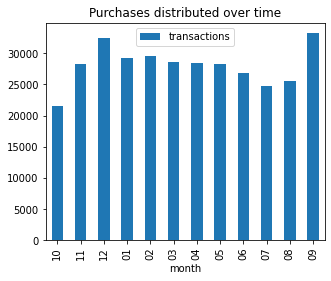

Monthly distribution looks normal, no extreme months
Next lets see what customers are making the most purchases

client_id
c_1609       12855
c_6714        4473
c_3454        3275
c_4958        2562
c_2140         195
c_7959         195
c_8026         193
c_2595         193
c_3725         190
c_7421         189
dtype: int64

Wow, ok we have some extreme values here. One customer is responsible for buying almost 13k products, we also have 3 customers buying a suspicious amount ontop of that.
We will return to this as it is not related to the integrity of the data itself


In [27]:
# Transaction Table Date Range Extremes
print("Date range starts '{0}' and ends at '{1}'\n".format(trs[['date']].min().values[0],trs[['date']].max().values[0]))

# Add a date column
trs['only_date'] = pd.to_datetime(trs['date']).dt.date
# Add a year column
trs['year']=pd.DatetimeIndex(trs['only_date']).year
# Add a month column
trs['month'] = pd.to_datetime(trs['only_date']).dt.month
trs['month']=trs['month'].apply(lambda x: "0" + str(x)  if int(x)<10 else x)
# Add a year-month column
trs['year_month']= trs['year'].map(str)+ "-" + trs['month'].map(str) 


time_distro=trs[['month','session_id']].groupby(['month']).count().reset_index()
time_distro.columns=['month','transactions']

time_distro.plot(kind='bar', figsize=(5,4), x='month', title="Purchases distributed over time")
plt.show()
print("Monthly distribution looks normal, no extreme months")

# Transaction Table - Over-represented customers
print("Next lets see what customers are making the most purchases\n\n{0}\n".format(trs[['client_id']].value_counts().head(10)))
print("Wow, ok we have some extreme values here. One customer is responsible for buying almost 13k products, we also have 3 customers buying a suspicious amount ontop of that.")
print("We will return to this as it is not related to the integrity of the data itself")



In [28]:
# Customer Table Date Range Extremes
print("We can first look for the gender distribution\n {0}\n".format(csm[['sex']].value_counts()))
print("This looks like one would expect\n")
print("Next we check the age distribution\n")
print(csm[['birth']].describe())
print("\nNo birth date is beyond what is possible, the average and quartiles looks normal")


We can first look for the gender distribution
 sex
f      4490
m      4131
dtype: int64

This looks like one would expect

Next we check the age distribution

             birth
count  8621.000000
mean   1978.275606
std      16.917958
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000

No birth date is beyond what is possible, the average and quartiles looks normal


In [29]:
# Product Table Date Range Extremes
print("It could be a good idea to see the distribution of product groups\n {0}\n".format(prd[['categ']].value_counts()))
print("We now know produict 0 is the most frequently sold and product 2 is the least sold. Nothing extreme here\n")


It could be a good idea to see the distribution of product groups
 categ
0        2308
1         739
2         239
dtype: int64

We now know produict 0 is the most frequently sold and product 2 is the least sold. Nothing extreme here



<div class="alert alert-block alert-success">
<b>Result for Outliers Check</b><br> Only the transaction table has some interesting results, we can see some outliers in terms of prucases per customer, however this is not an issue for the data itself, but will be important to consider when we analyse the data. We leave this for and return to it later.



### Merge the Files

Now we have done a bit of cleaning so we will merge (join) the products and the customers into the transaction dataframe so we can start working on the analysis.

Lets see how the join goes.

In [33]:
# Step 1. Left join Products (prd) to our main Transaction table (trs) and form a new table trs2
trs2 = pd.merge(trs, prd, how="left", on='id_prod')
# Step 2. Again left join Customers (csm) to the above merged trs2
trs2 = pd.merge(trs2, csm, how="left", on='client_id')
trs2 = trs2[['session_id','date','only_date','year','month','year_month','id_prod','categ','price','client_id','sex','birth']]
# Lets peek
trs2.head(5)

,session_id,date,only_date,year,month,year_month,id_prod,categ,price,client_id,sex,birth
0,s_18746,2021-04-10 18:37:28.723910,2021-04-10,2021,04,2021-04,0_1483,0.0,4.99,c_4450,f,1977
1,s_159142,2022-02-03 01:55:53.276402,2022-02-03,2022,02,2022-02,2_226,2.0,65.75,c_277,f,2000
2,s_94290,2021-09-23 15:13:46.938559,2021-09-23,2021,09,2021-09,1_374,1.0,10.71,c_4270,f,1979
3,s_105936,2021-10-17 03:27:18.783634,2021-10-17,2021,10,2021-10,0_2186,0.0,4.20,c_4597,m,1963
4,s_63642,2021-07-17 20:34:25.800563,2021-07-17,2021,07,2021-07,0_1351,0.0,8.99,c_1242,f,1980


Now that we have merged them into one table we will look for unusual or abnormal features of the data. Since we joined two data sets to the transactions, we want to see if everything matched. So a left join can leave NaN values, lets check



In [34]:
print("Did the left join find a product match for all transactions?")
print("Counting product data NaN values: {0}\n".format(trs2[['price']].isna().sum()))

print("Did the left join find a client match for all transactions?")
print("Counting client data NaN values: {0}\n".format(trs2[['birth']].isna().sum()))

Did the left join find a product match for all transactions?
Counting product data NaN values: price    103
dtype: int64

Did the left join find a client match for all transactions?
Counting client data NaN values: birth    0
dtype: int64



We seem to have 103 unmatched transactions towards the product data after the join. This can sometimes happen and is often worth investigating, however this time we will just ignore them since these are so few in comparison to the full table and will not likely affect the analysis that follows

In [35]:
# Checking and removing 103 unmatched transactions

csm_tmp = trs2.loc[(trs2['price'].isna())][['client_id','id_prod']]
print("We have {0} transactions with {1} unique customers and {2} unique product".format(len(csm_tmp),len(csm_tmp['client_id'].unique()),len(csm_tmp['id_prod'].unique())))
print("We will remove these transactions since they are so few.")
print("Length BEFORE removal: {0}".format(len(trs2)))
trs2_clean=trs2[trs2['id_prod']!='0_2245']
print("Length AFTER removal: {0}".format(len(trs2_clean)))

We have 103 transactions with 100 unique customers and 1 unique product
We will remove these transactions since they are so few.
Length BEFORE removal: 336816
Length AFTER removal: 336713


In [ ]:
# Adding an age-calculation instead of birth
trs2_clean['age']=datetime.now().year-trs2_clean['birth']

In [41]:
# Finally we are ready to save our cleaned up content to a file for analysis (next notebook)
trs2_clean.to_csv("transactions_clean.csv")



### Analyse Data (Univariate)
***
<b>Table of Content</b>
* [Define Functions](#Define-Functions)<br>
* [Load Cleaned Data](#Load-Cleaned-Data)<br>
* [Show Sales per month](#Show-Sales-per-month)<br>
* [Analyse Central Tendency and Dispersion](#Analyse-Central-Tendency-and-Dispersion)<br>
* [Measure of Dispersion](#Measure-of-Dispersion)<br>
* [Measure of Shape](#Measure-of-Shape)<br>
* [A concentration analysis](#A-concentration-analysis)<br>
* [Save to File](#Save-to-File)<br>

The goal here is to prepare a data analysis containing at least the following four techniques. We will use the tags <font color=teal><b>[T2a]</b></font>, <font color=teal><b>[T2b]</b></font>, <font color=teal><b>[T2c]</b></font> and <font color=teal><b>[T2d]</b></font> in the analysis to highlight when we have an example of them.

* <font color=teal><b>[T2a]</b></font> Indicators of central tendency and dispersion.
* <font color=teal><b>[T2b]</b></font> A concentration analysis, using a Lorenz curve and a Gini coefficient.
* <font color=teal><b>[T2c]</b></font> Graphic representations, including at least one histogram, a representation with boxplots, and a time series graph (i.e a graph in which the abscissa axis represents dates).
* <font color=teal><b>[T2d]</b></font> Bivariate analyses.



***

### Define Functions

In [4]:

def get_gini_index(inLorenze, inSize):
    try:
        return 2*(0.5-((inLorenze.sum()-inLorenze[-1]/2)/inSize))
    except ValueError:
        print("Exception in Gini Index method 'get_gini_index'.")
        return np.nan

def findOutliers(inData, inStdThreshold):
    outliers=[]
    mean = np.mean(inData)
    std = np.std(inData)
    for i in inData:
        check = (i-mean)/std
        if np.abs(check) > inStdThreshold:
            outliers.append(i)
    return outliers

<font size=1>[(Back to top)](#Analyze-your-company's-sales-(2/3))</font>
### Load Cleaned Data

We will now load up the data that was prepared in the previous note book, once again the transaction table will be named 'trs'.

In [3]:
trs = pd.read_csv("transactions_clean.csv",parse_dates=[3])
trs.head(5)

,Unnamed: 0,session_id,date,only_date,year,month,year_month,id_prod,categ,price,client_id,sex,birth,age
0,0,s_18746,2021-04-10 18:37:28.723910,2021-04-10,2021,4,2021-04,0_1483,0.0,4.99,c_4450,f,1977,45
1,1,s_159142,2022-02-03 01:55:53.276402,2022-02-03,2022,2,2022-02,2_226,2.0,65.75,c_277,f,2000,22
2,2,s_94290,2021-09-23 15:13:46.938559,2021-09-23,2021,9,2021-09,1_374,1.0,10.71,c_4270,f,1979,43
3,3,s_105936,2021-10-17 03:27:18.783634,2021-10-17,2021,10,2021-10,0_2186,0.0,4.20,c_4597,m,1963,59
4,4,s_63642,2021-07-17 20:34:25.800563,2021-07-17,2021,7,2021-07,0_1351,0.0,8.99,c_1242,f,1980,42


<font size=1>[(Back to top)](#Analyze-your-company's-sales-(2/3))</font>
#### Show Sales per month

A standard KPI in a sales report is sales volume, so we will display this metric in a per-month summary.

We find that there are missing values in October 2021, we have to address this first



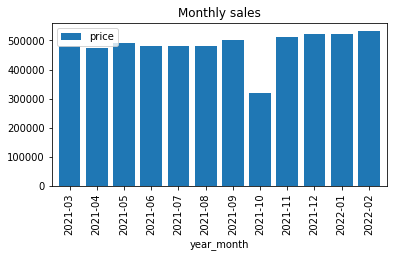

In [4]:
trs_monthly=trs[['year_month','price']].groupby('year_month').sum().reset_index()
trs_monthly.plot(kind='bar', stacked='true', width=0.8, figsize=(6,3), x='year_month', title="Monthly sales")
print('We find that there are missing values in October 2021, we have to address this first\n')


We have to figure out what is causing the dip in sales in October, and best way of doing this is to look at aggregated data over different dimensions. After looking through age and gender we finally found that the issue is with the product category. We can see it in the following chart

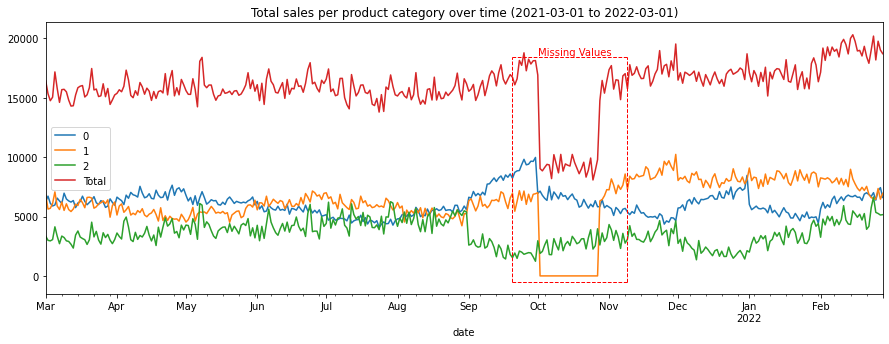

In [5]:
# Create a pivot with each category added as new columns
trs_cat_daily = trs.pivot_table(index=['only_date'], columns=['categ'], values=['price'], aggfunc=sum).reset_index()
trs_cat_daily.columns=['date','0','1','2']
trs_cat_daily.fillna(value=0, inplace=True)
trs_cat_daily['Total']=trs_cat_daily['0']+trs_cat_daily['1']+trs_cat_daily['2']

trs_cat_daily.plot(kind='line', figsize=(15,5), x='date', title="Total sales per product category over time (2021-03-01 to 2022-03-01)")

plt.text('2021-10-01',18600,'Missing Values', color='red',  fontsize=10)
plt.plot([18890, 18940], [18400, 18400], linestyle='--', linewidth=1, snap=True, color="red")
plt.plot([18890, 18940], [-500, -500], linestyle='--', linewidth=1, snap=True, color="red")
plt.plot([18890, 18890], [-500, 18400], linestyle='--', linewidth=1, snap=True, color="red")
plt.plot([18940, 18940], [-500, 18400], linestyle='--', linewidth=1, snap=True, color="red")

plt.show()

In [6]:
# Lets find the date range for the missing values of product category 1
sub_piv=trs_cat_daily.loc[trs_cat_daily['1']==0]
print("The issues starts at {0} and ends at {1}".format(sub_piv['date'].min(),sub_piv['date'].max()))

The issues starts at 2021-10-02 00:00:00 and ends at 2021-10-27 00:00:00


From here we can tell that the missing values are among category 1 products (yellow) between Oct 2 and Oct 27 2021. A good idea here is to impute new values in a way that will not affect the analysis too much. We will use forward fill

<AxesSubplot:title={'center':'Total sales per product category over time (2021-03-01 to 2022-03-01)'}, xlabel='date'>

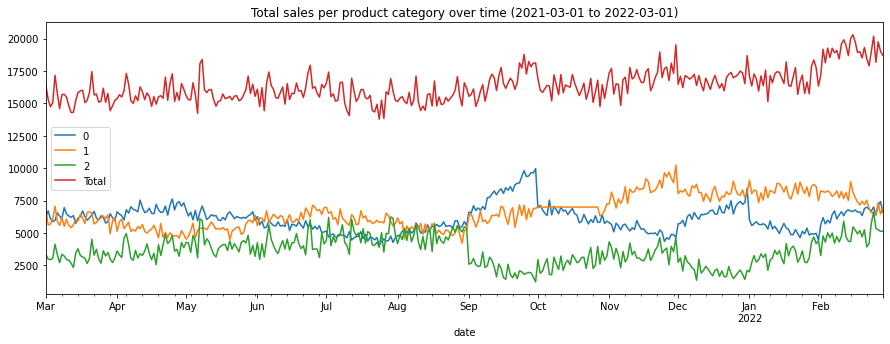

In [7]:
# Lets apply last step to the real data
trs_cat_daily=trs_cat_daily.replace({'0':np.nan, 0:np.nan})
trs_daily_imputed=trs_cat_daily.ffill()

# Re-add the 'Totals' column (since it doesn't contain our fix) and plot the results
trs_daily_imputed['Total']=trs_daily_imputed['0']+trs_daily_imputed['1']+trs_daily_imputed['2']
trs_daily_imputed.plot(kind='line', figsize=(15,5), x='date', title="Total sales per product category over time (2021-03-01 to 2022-03-01)")

<AxesSubplot:title={'center':'Monthly sales per product category (imputed values for Oct)'}, xlabel='year_month'>

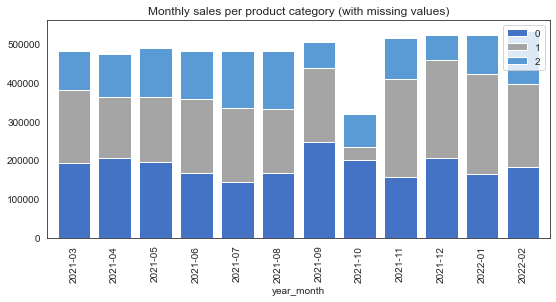

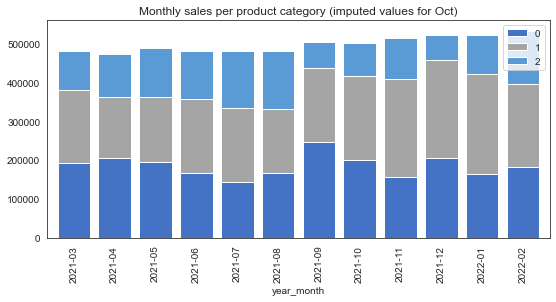

In [167]:
# Now we can finally create a monthly chart. Lets plot one before and one after the imputation
trs_cat_daily['year']=pd.DatetimeIndex(trs_cat_daily['date']).year
trs_cat_daily['month']=pd.DatetimeIndex(trs_cat_daily['date']).month
trs_cat_daily['month']=trs_cat_daily['month'].apply(lambda x: "0" + str(x)  if int(x)<10 else x)
trs_cat_daily['year_month']= trs_cat_daily['year'].map(str)+ "-" + trs_cat_daily['month'].map(str) 
trs_cat_monthly=trs_cat_daily[['year_month','0','1','2']].groupby('year_month').sum().reset_index()

trs_daily_imputed['year']=pd.DatetimeIndex(trs_daily_imputed['date']).year
trs_daily_imputed['month']=pd.DatetimeIndex(trs_daily_imputed['date']).month
trs_daily_imputed['month']=trs_daily_imputed['month'].apply(lambda x: "0" + str(x)  if int(x)<10 else x)
trs_daily_imputed['year_month']= trs_daily_imputed['year'].map(str)+ "-" + trs_daily_imputed['month'].map(str) 
trs_monthly_imputed=trs_daily_imputed[['year_month','0','1','2']].groupby('year_month').sum().reset_index()


trs_cat_monthly.plot(kind='bar', stacked='true', width=0.8, figsize=(9,4), x='year_month', 
                     title="Monthly sales per product category (with missing values)",color=['#4472C4', '#A5A5A5', '#5B9BD5'])
trs_monthly_imputed.plot(kind='bar', stacked='true', width=0.8, figsize=(9,4), x='year_month', 
                         title="Monthly sales per product category (imputed values for Oct)",color=['#4472C4', '#A5A5A5', '#5B9BD5'])



<div class="alert alert-block alert-success">
<b>Result for monthly sales complete</b><br> Imputing the new values have adjusted the October bar to nominal levels. We now have the first chartthat we can use for the presentation and it is part of task <font color=teal><b>[T2c]</b></font>. Next we want to analyse the demographics a little more.

In [42]:
# We need a few more values from the monthly data that we will use in the presentation

# Average monthly sales in the period
trs_monthly_imputed['Tot'] = trs_monthly_imputed['0'] + trs_monthly_imputed['1'] + trs_monthly_imputed['2']

# Average monthly sales per category
for pcat in trs_monthly_imputed.columns[-4:]:
    print("Monthly avg sales for {0}: {1}".format(pcat, trs_monthly_imputed[pcat].mean()))

growth_rate=trs_monthly_imputed['Tot'].pct_change().mean()
print("\nGrowth Rate: {} transactions per month".format(growth_rate))

Monthly avg sales for 0: 185810.22083333333
Monthly avg sales for 1: 202456.9125
Monthly avg sales for 2: 109955.8925
Monthly avg sales for Tot: 498223.0258333333

Growth Rate: 0.009845039235767395 transactions per month


<font size=1>[(Back to top)](#Analyze-your-company's-sales-(2/3))</font>
#### Analyse Central Tendency and Dispersion

For this part <font color=teal><b>[T2a]</b></font> we will use the following examples

- Central Tendencies for the clients over age 
- Dispersion of clients over age
- Concentration Analysis over age

Age mode: 18
Age mean: 43.7393023255814
Age median: 43.0


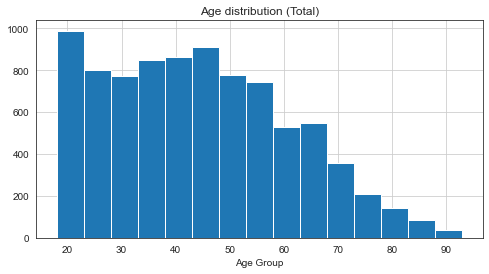

In [100]:
# Central Tendencies for Clients over Age

# First we capture each client from the transaction table
clients = trs[['client_id','age']].drop_duplicates('client_id').sort_values(['client_id'])

print("Age mode: {}".format(clients['age'].mode()[0]))
print("Age mean: {}".format(clients['age'].mean()))
print("Age median: {}".format(clients['age'].median()))

ax = clients.hist(column='age', grid=True, bins=15, figsize=(8,4)) 
for a in ax.flatten():
    a.set_title("Age distribution (Total)")
    a.set_xlabel('Age Group')

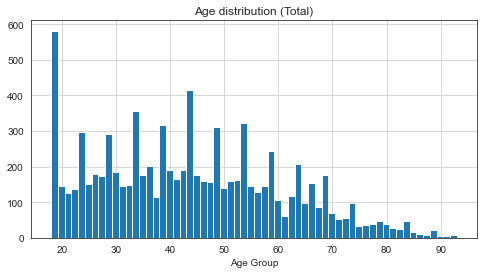

In [102]:
# The bias towards younge age groups combined with having a mode of 18 makes us want to look closer at the age groups
ax = clients.hist(column='age', grid=True, bins=60, figsize=(8,4)) 
for a in ax.flatten():
    a.set_title("Age distribution (Total)")
    a.set_xlabel('Age Group')

<div class="alert alert-block alert-success">
<b>Result for central tendencies on customer age</b><br> Being part of <font color=teal><b>[T2a]</b></font> we find that the customers average age is 43.7 years, the median is 43 and the mode is 18.<br><br>
Although the 18 year olds are over-represented in this chart, we have to assume that the number is probably a result of having a minimum option of 18 years old and people who are actually younger select 18 in lack of other options. We will leave this be.
    

<font size=1>[(Back to top)](#Analyze-your-company's-sales-(2/3))</font>
#### Measure of Dispersion
(customer age distribution)

In [103]:
print("Age empirical variance: {0}".format(clients['age'].var(ddof=0)))
print("Age standard deviation: {0}".format(clients['age'].std(ddof=0)))

Age empirical variance: 285.8727343969713
Age standard deviation: 16.907771420177507


<div class="alert alert-block alert-success">
<b>Result for dispersion of customer age</b><br> Being part of <font color=teal><b>[T2a]</b></font> we find that the value spread, or empirical variance is 182.9 and the standard deviation is 13.5

<font size=1>[(Back to top)](#Analyze-your-company's-sales-(2/3))</font>
#### Measure of Shape
(customer age distribution)

In [104]:
age_skew_indicator = clients['age'].skew()
age_kurtosis_indicator =clients['age'].kurtosis()
print("- Age distribution skew: {0}".format(age_skew_indicator))
if (age_skew_indicator==0):
    print(" (Age distribution is perfectly symmetrical)\n")
elif (age_skew_indicator>0):
    print(" (Age distribution is positively skewed (right))\n")
else:
    print(" (Age distribution is negatively skewed (left))\n")
    
print("- Age distribution kurtosis: {0}".format(age_kurtosis_indicator))
if (age_kurtosis_indicator==0):
    print(" (Age distribution has the shame of a bell curve)\n")
elif (age_kurtosis_indicator>0):
    print(" (Age distribution is more peaked than a bell curve)\n")
else:
    print(" (Age distribution is flatter than a bell curve)\n")

- Age distribution skew: 0.36158329863279115
 (Age distribution is positively skewed (right))

- Age distribution kurtosis: -0.6329903926466227
 (Age distribution is flatter than a bell curve)



<div class="alert alert-block alert-success">
<b>Result for measure of shape for customer age</b><br> This measurment is not part of the tasks, but we include it for a sense of completion. The age curve has a skew of +0.58  positively skewed (right) and its kurtosis is 0.45 which is slighlty more peaked than a regular normal distribution

,count,ratio
sex,,
f,4479,52.081395
m,4121,47.918605


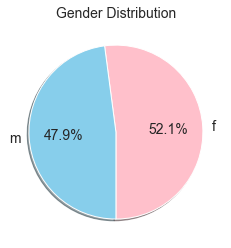

In [147]:
genders = trs[['client_id','sex']].drop_duplicates('client_id').sort_values(['client_id'])

gender_agg = genders.groupby(['sex']).count()
gender_agg.columns= ['count']
gender_agg['ratio'] = gender_agg['count']/gender_agg['count'].sum() * 100

plt.pie(gender_agg['count'], labels=gender_agg.index, colors=['#FFC0CB','skyblue'], autopct='%3.1f%%', 
        shadow=True, startangle=270, textprops={'fontsize': 14})
plt.title("Gender Distribution", size=14)
gender_agg

<font size=1>[(Back to top)](#Analyze-your-company's-sales-(2/3))</font>
#### A concentration analysis

For this part <font color=teal><b>[T2b]</b></font> we will look at sales per customer and present a concentration analaysis on their spending. A high degree of concentration means that a few customers do a lot of purchases and a low concentration means that everyone spends roughly the same. We will use a Lorenz Curve and find the Gini coefficient to investigate how our values deviate from a perfect spread


In [12]:
#Lets create a table with each unique customer and their total spending
client_purchases=trs[['client_id','price']].groupby(['client_id']).sum().sort_values(by='price').reset_index()
client_purchases.columns=['client_id','total_spending']
client_purchases.head(4)

,client_id,total_spending
0,c_8140,4.15
1,c_8114,4.99
2,c_1675,5.57
3,c_890,6.08


Checking for outliers among the purchasing customers.<br> 
<i>This will be hard to do visually so instead we will iterate through the data content and determine outliers with our custom function 'findOutliers' which takes the data itself and a threshold value of how many standard deviations we allow a value to be outside before calling it an outlier </i>

In [13]:
# How many standard deviations before we consider it an outlier
std_threshold = 3

# Home-made function searches for outliers
outliers = findOutliers(client_purchases['total_spending'],std_threshold)
nb_outliers=len(outliers)
if nb_outliers>10:
    print("We found {0} outliers outside of {1} standard deviations".format(nb_outliers, std_threshold))
else:
    print("We found {0} outliers outside of {1} standard deviations: {2}".format(nb_outliers, std_threshold,outliers))
outlier_csm = client_purchases.loc[client_purchases['total_spending'].isin(outliers)]
print("The customers we need to correct for are:\n{0}".format(outlier_csm['client_id']))



We found 4 outliers outside of 3 standard deviations: [54442.92, 73197.34, 144257.21, 162007.34]
The customers we need to correct for are:
8596    c_3454
8597    c_6714
8598    c_4958
8599    c_1609
Name: client_id, dtype: object


In [14]:
# We need to craete an alternative trs table without the outlier spenders
trs_reduced = trs[~trs['client_id'].isin(outlier_csm['client_id'].values)]  ### removing outliers here
print("After removing outliers {0} rows, before: {1} rows".format(len(trs_reduced),len(trs)))

After removing outliers 313552 rows, before: 336713 rows


In [15]:
client_purchases=trs[['client_id','price']].groupby(['client_id']).sum().sort_values(by='price').reset_index()
client_purchases.columns=['client_id','total_purchase']

client_purchases_reduced=trs_reduced[['client_id','price']].groupby(['client_id']).sum().sort_values(by='price').reset_index()
client_purchases_reduced.columns=['client_id','total_purchase']


### Mean 
mean_before = client_purchases['total_purchase'].mean()
mean_after = client_purchases_reduced['total_purchase'].mean()

### Median
median_before = np.median(client_purchases['total_purchase'])
median_after = np.median(client_purchases_reduced['total_purchase'])

### Std
std_before = np.std(client_purchases['total_purchase'])
std_after = np.std(client_purchases_reduced['total_purchase'])

### Skew
skew_before = client_purchases['total_purchase'].skew()
skew_after = client_purchases_reduced['total_purchase'].skew()

### Kurtosis
kurtosis_before = client_purchases['total_purchase'].kurtosis()
kurtosis_after = client_purchases_reduced['total_purchase'].kurtosis()

print("Mean before: {0}, mean after removing outliers: {1}".format(round(mean_before,2),round(mean_after,2)))
print("Median before: {0}, median after removing outliers: {1}".format(round(median_before,2),round(median_after,2)))
print("Std before: {0}, std after removing outliers: {1}".format(round(std_before,2),round(std_after,2)))

print("Skew before: {0}, skew after removing outliers: {1}".format(round(skew_before,2),round(skew_after,2)))
print("Kurtosis before: {0}, kurtosis after removing outliers: {1}".format(round(kurtosis_before,2),round(kurtosis_after,2)))


Mean before: 674.02, mean after removing outliers: 623.86
Median before: 501.31, median after removing outliers: 501.17
Std before: 2565.7, std after removing outliers: 457.0
Skew before: 53.0, skew after removing outliers: 1.15
Kurtosis before: 3053.85, kurtosis after removing outliers: 1.03


A great example of how outliers affect the mean by a lot (from 674 to 624) while the median only changes by a little (from 501.3 tp 501.2)

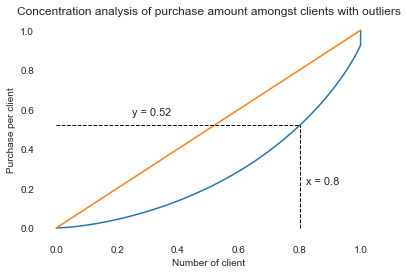

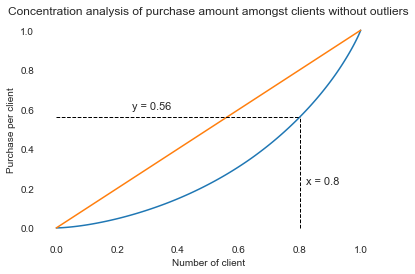

In [16]:
# Finally we do the concentration analysis. Better yet, we can compare data befor and after removing outliers

n_before = len(client_purchases["total_purchase"].values)
n_after =  len(client_purchases_reduced["total_purchase"].values)

lorenz_y_before = (np.cumsum(client_purchases["total_purchase"].sort_values())/client_purchases["total_purchase"].sum())
lorenz_y_before= np.append([0], lorenz_y_before)
lorenz_y_after = (np.cumsum(client_purchases_reduced["total_purchase"].sort_values())/client_purchases_reduced["total_purchase"].sum())
lorenz_y_after= np.append([0], lorenz_y_after)

sns.set_style("white")
ax_before = plt.subplots()
xaxis = np.linspace(0 - 1 / n_before, 1 + 1 / n_before, n_before + 1)
plt.plot(xaxis, lorenz_y_before, drawstyle="steps-post")
plt.plot([0, 1], [0, 1])
plt.plot([0.8, 0.8], [0, 0.52],linestyle='--', linewidth=1, snap=True, color="black")
plt.plot([0, 0.8], [0.52, 0.52],linestyle='--', linewidth=1, snap=True, color="black")
plt.title("Concentration analysis of purchase amount amongst clients with outliers")
plt.xlabel("Number of client")
plt.ylabel("Purchase per client")
plt.text(0.25,0.57,'y = 0.52',  fontsize=11)
plt.text(0.82,0.22,'x = 0.8',  fontsize=11)
plt.box(False)
plt.show()

sns.set_style("white")
xaxis = np.linspace(0 - 1 / n_after, 1 + 1 / n_after, n_after + 1)
plt.plot(xaxis, lorenz_y_after, drawstyle="steps-post")
plt.plot([0, 1], [0, 1])
plt.plot([0.8, 0.8], [0, 0.56],linestyle='--', linewidth=1, snap=True, color="black")
plt.plot([0, 0.8], [0.56, 0.56],linestyle='--', linewidth=1, snap=True, color="black")
plt.title("Concentration analysis of purchase amount amongst clients without outliers")
plt.xlabel("Number of client")
plt.ylabel("Purchase per client")
plt.text(0.25,0.60,'y = 0.56',  fontsize=11)
plt.text(0.82,0.22,'x = 0.8',  fontsize=11)
plt.box(False)
plt.show()

In [17]:
print("Gini Index with outliers: {0}\nGini Index without outliers: {1}".format(
    round(get_gini_index(lorenz_y_before,n_before),4),
    round(get_gini_index(lorenz_y_after,n_after),4)))


Gini Index with outliers: 0.4397
Gini Index without outliers: 0.3951


<div class="alert alert-block alert-success">
<b>Result for Measure of Concentration</b><br>This is en excellent showcase of how extreme outliers can affect the mean dramatically, but not the median. The Skew and the Kurosis (measures of shape) are also heavily affected by extreme values.
    
The measure of concentration is showcased through two lorenz curve, with and without outliers. Notice how the gini index varies and the removal of outliers bring the index closer to zero (more evenly distributed). Only 20% of the customers is responsible for half of the sales.


#### Save to File

In [18]:
# We save the transaction table without outliers for the bivariate analysis
trs_reduced.to_csv("transactions_reduced.csv")



### Analyse Data (Bivariate)

***
<b>Table of Content</b>
* [Define Functions](#Define-Functions)<br>
* [Load Reduced Data](#Load-Reduced-Data)<br>
* [Graphical representation of gender and product purchases and spending](#Graphical-representation-of-gender-and-product-purchases-and-spending)
* [Correlation Checks](#Correlation-Checks)<br>
    * [Check 1: Linear Regression](#Check-1:-Linear-Regression)<br>
    * [Check 2: ANOVA](#Check-2:-ANOVA)<br>
    * [Check 3: Chi-Square Test](#Check-3:-Chi-Square-Test)<br>


In the last part of Task 2, we want to perform the three correlation tests outlined in the Bivariate Analysis part of the course. The goal here is to find relevant correlations containing more than one variable using all three techniques. This part only concerns the last part (<font color=teal><b>[T2d]</b></font>) of Task 2. 

* <font color=teal><b>[T2d]</b></font> Bivariate analyses.



***


### Define Functions

In [5]:
def dropCol(inFrame, inCols):
    for col in inFrame.columns:
        for dcol in inCols:
            if col==dcol:
                del inFrame[col]

def age_to_agegroup(inAge, age_thresholds):
    if (type(inAge) is int):
        for key in age_thresholds:
            if (inAge<=key):
                return age_thresholds[key]
        return 'last'
    else:
        print("Type error. Value type ({0}) is not an int".format(type(inAge)))
        return np.NaN


def conv_date(indate):
    return datetime.strptime(indate,'%Y-%m-%d %H:%M:%S.%f').date()
    
def replace_zero_sessions(inDuration):
    if (inDuration==0):
        return 500
    else:
        return inDuration
    
def eta_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS


### Load Reduced Data

We will now load up the data that was prepared in the previous note book (P5_02_script_dataanalysis_univariate.ipynb), once again the transaction table will be named 'trs'.

In [3]:
trs = pd.read_csv("transactions_reduced.csv",parse_dates=[4])
dropCol(trs,['Unnamed: 0.1','Unnamed: 0'])
trs

,session_id,date,only_date,year,month,year_month,id_prod,categ,price,client_id,sex,birth,age
0,s_18746,2021-04-10 18:37:28.723910,2021-04-10,2021,4,2021-04,0_1483,0.0,4.99,c_4450,f,1977,45
1,s_159142,2022-02-03 01:55:53.276402,2022-02-03,2022,2,2022-02,2_226,2.0,65.75,c_277,f,2000,22
2,s_94290,2021-09-23 15:13:46.938559,2021-09-23,2021,9,2021-09,1_374,1.0,10.71,c_4270,f,1979,43
3,s_105936,2021-10-17 03:27:18.783634,2021-10-17,2021,10,2021-10,0_2186,0.0,4.20,c_4597,m,1963,59
4,s_63642,2021-07-17 20:34:25.800563,2021-07-17,2021,7,2021-07,0_1351,0.0,8.99,c_1242,f,1980,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313547,s_65686,2021-07-22 13:47:39.400914,2021-07-22,2021,7,2021-07,0_1475,0.0,11.99,c_5607,m,1950,72
313548,s_159138,2022-02-03 01:39:15.793010,2022-02-03,2022,2,2022-02,1_498,1.0,23.37,c_1857,f,1990,32
313549,s_50568,2021-06-19 00:19:23.917703,2021-06-19,2021,6,2021-06,0_759,0.0,22.99,c_6268,m,1991,31
313550,s_7219,2021-03-16 17:31:59.442007,2021-03-16,2021,3,2021-03,0_1256,0.0,11.03,c_4137,f,1968,54


<font size=1>[(Back to top)](#Analyze-your-company's-sales-(3/3))</font>
#### Graphical representation of gender and product purchases and spending

<font color=orange><b>Box plot for gender based spending habits</font></b><br>
In this step we will make a graphical representation of gender and their spending habits

sex: f, category: 0.0, size: 2756
sex: f, category: 2.0, size: 254
sex: f, category: 1.0, size: 1431
sex: m, category: 0.0, size: 2657
sex: m, category: 2.0, size: 217
sex: m, category: 1.0, size: 1281
We found 6 groups


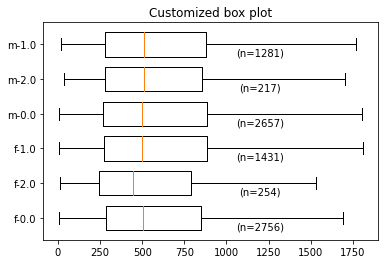

<Figure size 1296x1872 with 0 Axes>

In [4]:
bin_size = 500 # size of bins for discretization

groups = [] # will receive the aggregated data to be displayed

# slices are calculated from 0 to the maximum balance in increments of bin_size]
genders = trs['sex'].unique()
categories = trs['categ'].unique()

# Working set
trs_csm = trs[['client_id','sex','price']].groupby(['client_id','sex']).sum().reset_index()


inc=0
for s in genders:
    for c in categories:
        amounts = trs_csm.loc[(trs['sex']==s) & (trs['categ']==c)]['price'] 
        print("sex: {0}, category: {1}, size: {2}".format(s,c,len(amounts)))
        if (len(amounts)>0):
            inc+=500
            g = {
                'values': amounts,
                'bin_center': inc,
                'size': len(amounts),
                'quartiles': [np.percentile(amounts.fillna(0),p) for p in [25,50,75]],
                'name': "{0}-{1}".format(str(s),str(c))
            }
            groups.append(g)
print("We found {0} groups".format(len(groups)))


plt.boxplot([g["values"].fillna(0) for g in groups],
            labels=[g["name"] for g in groups],
            
            positions= [g["bin_center"] for g in groups], # X-axis of box plots
            showfliers=False, # outliers are not included
            widths= bin_size*0.7, # graph width of box plots
            vert=False
           )
for g in groups:
    plt.text(1200,g["bin_center"]-50,"(n={0})".format(g["size"]),horizontalalignment='center',verticalalignment='top')    
plt.title("Customized box plot")
plt.figure(figsize=(18, 26))
plt.show()




<font size=1>[(Back to top)](#Analyze-your-company's-sales-(3/3))</font>
### Correlation Checks

We will look at one example of each type of correlation test 


<table align=left text-align=left>
<tr>
    <th>Types</th>
    <th>Var1</th>
    <th>Var2</th>
    <th>Visual Representation</th>
    <th>Correlation Method</th>
    <th>Shortcut</th>
</tr>
<tr>
    <td>Quantitative x2</td>
    <td>Spending</td>
    <td>Session Time</td>
    <td>Scatter Plot</td>
    <td>Linear Regression</td>
    <td>link</td>
</tr>
<tr>
    <td>Qualitative/Quantitative</td>
    <td>Age Group</td>
    <td>Spending</td>
    <td>Box Plot</td>
    <td>ANOVA</td>
    <td>link</td>
</tr>
<tr>
    <td>Qualitative x2</td>
    <td>Gender</td>
    <td>Product Category</td>
    <td>Mosaic Plot</td>
    <td>Chi-Square Test</td>
    <td>link</td>
</tr>    
</table> 


<font size=1>[(Back to top)](#Analyze-your-company's-sales-(3/3))</font>
#### Check 1: Linear Regression

In the first check we will investigate two quantitative variables Session Time Range (seconds) and Spending (USD) to see if we can find any correlation between them

1. Create a new transaction table for sessions called <b>trs_sessions</b>
2. The table needs session_id, session_start, session_duration_sec, product_total
3. Use Scatter Plot to visualize
4. Calculate the coefficient to establish or reject correlation

In [44]:
# Lets start making our new table

# Convert obj to datetime
trs['date']=trs['date'].apply(datetime_conversion) 

# Aggregate to get min/max datetime and also sum up price over each session
trs_sessions = trs[['session_id','date','price']].groupby(['session_id'], as_index=False).agg({'date':['min','max','count'], 'price':['sum']}).reset_index()
trs_sessions.columns = [f"{x}_{y}" for x, y in trs_sessions.columns.to_flat_index()]

# Add new col for duration (seconds)
trs_sessions['duration'] = (trs_sessions['date_max']-trs_sessions['date_min']).dt.total_seconds()

trs_sessions[['price_sum','duration']]


,price_sum,duration
0,11.99,0.000000
1,26.99,0.000000
2,33.72,1874.452683
3,39.22,2822.751836
4,41.49,1738.012110
...,...,...
157784,28.92,1318.904123
157785,19.84,0.000000
157786,56.27,1212.894656
157787,6.99,0.000000


We need to assign an estimate to single purchase sessions since they come up as 0 seconds. We use the below chart to estimate that a single purchase on average takes 500s

<AxesSubplot:title={'center':'Session duration vs number of purchases'}, xlabel='date_count'>

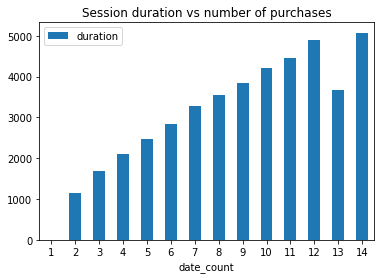

In [46]:
# Check where we establish that a single purchase should average around 0.5 seconds
session_length=trs_sessions[['date_count','duration']].groupby(['date_count']).mean().reset_index()
session_length.plot.bar(x='date_count', y='duration', rot=0, title="Session duration vs number of purchases")


<AxesSubplot:title={'center':'Session duration vs spending'}, xlabel='Duration', ylabel='Spending'>

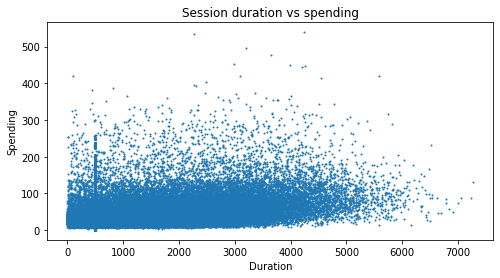

In [41]:
# Last we update every zero duration with 500
trs_sessions['duration']=trs_sessions['duration'].apply(replace_zero_sessions)

# Plot content
trs_sessions=trs_sessions[['duration','price_sum']]
trs_sessions.columns = ['Duration','Spending']
trs_sessions.plot.scatter(x='Duration',y='Spending', s=1, figsize=(8,4), title="Session duration vs spending")


The thick line around 500 sec is the effect from artificially moving all single sessions to this time. In reality they would be spread out like everything else.

In [8]:
# Finally we calculate the Pearson's Coefficient

print("Finally we have the result of our testing, the Pearson Coefficient is {0}".format(st.pearsonr(trs_sessions["duration"],trs_sessions["price_sum"])[0]))
print("We should add that this r coefficient is stronger when the value is closer to 1 or -1 and the weakest when it hits zero.")
print("This shows a moderate but non-zero correlation between session time and spending according to Henseler rule of thumb")


Finally we have the result of our testing, the Pearson Coefficient is 0.44751165388674363
We should add that this r coefficient is stronger when the value is closer to 1 or -1 and the weakest when it hits zero.
This shows a moderate but non-zero correlation between session time and spending according to Henseler rule of thumb


In [9]:
# Here we will compare the above r_square with different scenarios where certain values are not allowed

# Original value c1
c1 = st.pearsonr(trs_sessions["duration"],trs_sessions["price_sum"])[0]
# Special Scenario; no spening above 150
trs_sessions2 = trs_sessions[trs_sessions["price_sum"]<150]
# Special Scenario; no session duration above 6
trs_sessions2 = trs_sessions2[trs_sessions2["duration"]<6000]

c2 = st.pearsonr(trs_sessions2["duration"],trs_sessions2["price_sum"])[0]

print("\nWe can see how the removal of extreme values affects the coefficient\n")
print("Original data gives a coefficient: {0}".format(c1))
print("Removing any price points above 150 USD and any session durations above 6000 gives a coefficient: {0}".format(c2))


We can see how the removal of extreme values affects the coefficient

Original data gives a coefficient: 0.44751165388674363
Removing any price points above 150 USD and any session durations above 6000 gives a coefficient: 0.49911447857283503


<div class="alert alert-block alert-success">
<b>Result for Linear Regression Correlation</b><br> We find a Pearson Coefficient of 0.44 so we have a moderate correlation between session time and spending according to Hanseler's Rule of Thumb.
    
If we create a special scenario where we ignore spending above 150 and session times over 6000, then we slightly increase the correlation coefficient from 0.44 to 0.49



#### Check 2: ANOVA

In the second correlation check we will investigate one Qualitative (Age Group) and one Quantitative variable (Spending in USD) to see if we can find any correlation between them

1. Create a new transaction table for sessions called <b>trs_age</b>
2. The table starts as session_id, age_group, product_total
3. Use Box Plot to visualize
4. Calculate the coefficient to establish or reject correlation


Presenting below is a bar for each 10th percentile age group and the total spending within each



,age_group,spending
0,0_22,638740.79
1,22_27,515839.46
2,27_33,633472.41
3,33_38,671801.35
4,38_43,703348.59
5,43_47,519426.63
6,47_53,556975.28
7,53_59,387671.10
8,59_67,380612.88
9,last,354784.47


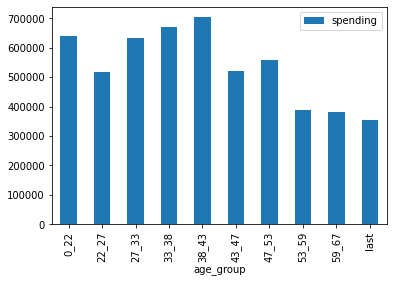

In [10]:
# Lets start making our new table

# Step 1, Lets create a customer spending table first like before, we include age this time
trs_age = trs[['client_id','age','price']].groupby(['client_id','age']).sum().reset_index()

# Lets create age groups, we want the histogram to have a few bars to show, so we chose a 10th percentile based split. 
# The benefit of percentiles over round-number groups is that we will capture a statistically significant sample in each group
# We chose the natural percentiles from the ages in our data
age_brackets=([np.percentile(trs_age['age'].fillna(0),p) for p in np.array([i*10+10 for i in range(9)])])
age_group_dict={}
i=-1
previous='0'
for age in age_brackets:
    i+=1
    age_group_dict[age]="{0}_{1}".format(previous,str(round(age)))
    previous = str(round(age))


# Now we use the age group conversion and createa a new column for it
trs_age['age_group'] = [age_to_agegroup(t, age_group_dict) for t in trs_age['age']] 

# Group by age_group
trs_age_agg = trs_age[['age_group','price']].groupby(['age_group']).sum().reset_index()
trs_age_agg.columns=['age_group','spending']

print("\nPresenting below is a bar for each 10th percentile age group and the total spending within each\n")
trs_age_agg.plot(kind='bar', x='age_group')

trs_age_agg.head(10)




Presenting below is a Box Plot for each 10th percentile age group and the total spending within each



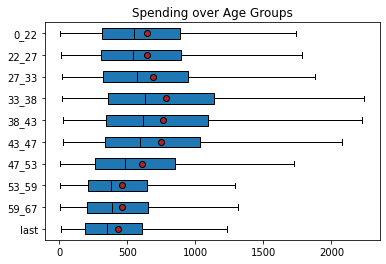

array(['last', '59_67', '53_59', '47_53', '43_47', '38_43', '33_38',
       '27_33', '22_27', '0_22'], dtype=object)

In [21]:
X = 'age_group' # Qualitative
Y = 'price' # Quantitative 


ages = trs_age[X].sort_values(ascending=False).unique()
groups = []

for ag in ages:
    groups.append(trs_age[trs_age[X]==ag][Y])


medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
            
plt.boxplot(groups, labels=ages, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
print("\nPresenting below is a Box Plot for each 10th percentile age group and the total spending within each\n")
plt.title("Spending over Age Groups")
plt.show()


In [12]:
# Finally we can use our home made function 'eta_squared' to calculate the actual correlation
 
eta2=eta_squared(trs_age[X],trs_age[Y])
if (eta2<=0.1):
    print("The eta squared value {0} is low, so we have a very bad correlation".format(round(eta2,2)))
elif (eta2<=0.25):
    print("The eta squared value {0} is weak, so we have almost no correlation".format(round(eta2,2)))
elif (eta2<=0.75):
    print("The eta squared value {0} is ambigous, so we have only a weak correlation".format(round(eta2,2)))
elif (eta2<=0.9):
    print("The eta squared value {0} is high, so we have a good indication of a correlation".format(round(eta2,2)))
elif (eta2>0.9):
    print("The eta squared value {0} is very high, so we have a strong indication of a correlation".format(round(eta2,2)))
else:
    print("Error")



The eta squared value 0.07 is low, so we have a very bad correlation


<div class="alert alert-block alert-success">
<b>Result for ANOVA correlation</b><br>Using the eta-squared method we investigate the possible correlation between age group and spending. eta-squared is only 0.07, meaning we have a very poor correlation.



<font size=1>[(Back to top)](#Analyze-your-company's-sales-(3/3))</font>
#### Check 3: Chi-Square Test

The third check includes a correlation test beween two qualtitative variables; Gender and Product Preference

1. Create a new transaction table for sessions called <b>trs_gender</b>
2. The table needs gender, product_cat
3. Use Mosaic Plot to visualize
4. Calculate the coefficient to establish or reject correlation

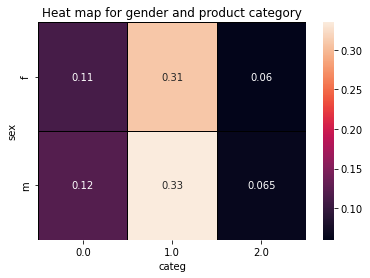

10.202417277273174

In [42]:
# Faster way of doing the same thing (help from my mentor)
X='sex'
Y='categ'

trs_gender = trs[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

tx = trs_gender.loc[:,["Total"]]
ty = trs_gender.loc[["Total"],:]

n = len(trs)
indep = tx.dot(ty) / n

obs = trs_gender.fillna(0) 
measure = (obs-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], linewidths=1, linecolor="k")
plt.title("Heat map for gender and product category")
plt.show()
xi_n


<div class="alert alert-block alert-success">
<b>Result for Chi-Square Test</b><br> We don't have that many values in our tables, but the highest values are around product category = 0.33 and that this goes for both genders. This indicates that we found a product that his most responsible for non-independency.
    
The xi-value is 10.2 (extreme values removed)




### Additional questions
***
<b>Table of Content</b>
* [Define Functions](#Define-Functions)<br>
* [Load Data from Task 2](#Load-Data-from-Task-2)<br>
* [Correlation between gender and product category ?]<br>
* Age related Correlations<br>
    * [Age and total amount of purchases](#Age-and-total-amount-of-purchases)<br>
    * [Age and monthly purchase frequency](#Age-and-monthly-purchase-frequency)<br>
    * [Age and average basket size](#Age-and-average-basket-size)<br>
    * [Age and purchased product category](#Age-and-purchased-product-category)<br>


A few more questions related to the company's sales numbers:
<table align=left style="background-color:#111110;">
  <tr><td>
    <font color=#FF7744>
    <i>
        <ul>
            <li>Is there a correlation between gender and categories of products purchased?</li>
            <li>Is there a correlation between age and:</li>
            <ul>
                <li> The total amount of purchases?</li>
                <li> The purchase frequency (the number of purchases per month for example)?</li>
                <li> The average basket size (in number of items)?</li>
                <li> Categories of purchased products?</li>
            </ul>
        </ul>
    </i>
    </font>
  </td></tr>      
</table>
  




### Define Functions

In [6]:

def dropCol(inFrame, inCols):
    for col in inFrame.columns:
        for dcol in inCols:
            if col==dcol:
                del inFrame[col]

def age_to_agegroup(inAge, age_thresholds):
    if (type(inAge) is int):
        for key in age_thresholds:
            if (inAge<=key):
                return age_thresholds[key]
        return 'last'
    else:
        print("Type error. Value type ({0}) is not an int".format(type(inAge)))
        return np.NaN


def conv_date(indate):
    return datetime.strptime(indate,'%Y-%m-%d %H:%M:%S.%f').date()
    
def replace_zero_sessions(inDuration):
    if (inDuration==0):
        return 500
    else:
        return inDuration
    
def eta_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS

### Load Data from Task 2

In [3]:
trs = pd.read_csv("transactions_reduced.csv",parse_dates=[4])
dropCol(trs,['Unnamed: 0.1','Unnamed: 0'])


#### Correlation between gender and product category

We treat gender and product category as qualitative (categorical) variables, so it follows that we will use the chi-squared method to find relations.

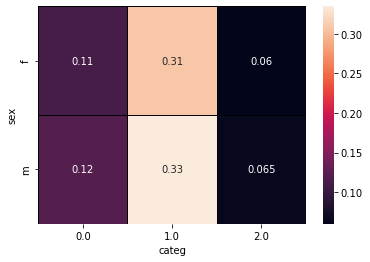

In [4]:
# Pick the two qualitative vars
X='sex'
Y='categ'

# Generate a pivot table with gender (X) as rows and product category (Y) as columns
trs_gender = trs[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

# Get the sub-totals (sums) for each row and each column
tx = trs_gender.loc[:,["Total"]]
ty = trs_gender.loc[["Total"],:]

# Find N (grand total)
n = len(trs)

# Matrix dot operation 
indep = tx.dot(ty) / n

obs = trs_gender.fillna(0) 
measure = (obs-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

# Define Heatmap
sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], linewidths=1, linecolor="k")

# Plot!
plt.show()


<div class="alert alert-block alert-success">
<b>Result for Gender and Product Category</b><br> This is the same test as we performed last in Task 2. As before we can see that category 1.0 is the product that his most reponsible for non-independency. It deviates the most from the expected values estimated from the subtotal frequency.



#### Age and total amount of purchases

We will use r-squared to test customer age (quantitative) and purchases counts (quantitative).

The r-squared value 0.03 is low, so we have a very bad correlation


<AxesSubplot:xlabel='age', ylabel='purchases'>

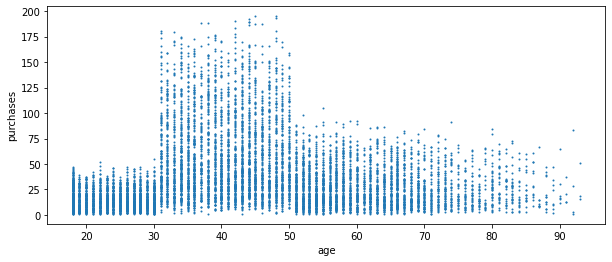

In [5]:
# Step 1. Get a table with age and transaction count aggregated over client_id
trs_age_amount = trs[['client_id','age','date']].groupby(['client_id','age']).count().reset_index()
trs_age_amount.columns = ['client_id','age','purchases']

# Step 2. Use the premade function to calculate the correlation coefficient
r_square1 = st.pearsonr(trs_age_amount["age"],trs_age_amount["purchases"])[0]


if (r_square1<=0.1):
    print("The r-squared value {0} is low, so we have a very bad correlation".format(round(r_square1,2)))
elif (r_square1<=0.25):
    print("The r-squared value {0} is weak, so we have almost no correlation".format(round(r_square1,2)))
elif (r_square1<=0.75):
    print("The r-squared value {0} is ambigous, so we have only a weak correlation".format(round(r_square1,2)))
elif (r_square1<=0.9):
    print("The r-squared value {0} is high, so we have a good indication of a correlation".format(round(r_square1,2)))
elif (r_square1>0.9):
    print("The r-squared value {0} is very high, so we have a strong indication of a correlation".format(round(r_square1,2)))
else:
    print("Error")

trs_age_amount[['age','purchases']].plot.scatter(x='age',y='purchases', s=1, figsize=(10,4))

<div class="alert alert-block alert-success">
<b>Result for Age and total amount of purchases</b><br>We find a weak correlation between Age and Purchase volume. Our eta squared correlation test shows <b>0.03</b>. The reason r-squared shows weak correlation is because the curve is not linear. However, from the visualisation we can see that age groups 31-50 is spending more than other ages.
</div>



#### Age and monthly purchase frequency

We will find r-squared from the vars age (quanititative) and number of purchases (quantitative).  Note that this task is similar but not exactly the same as the Task 2 calculation between age and total spending. In that task we measure the correlation between the age and purchase value, and here we measure age vs amount of purchases.

The r-squared value -0.03 is low, so we have a very bad correlation


<AxesSubplot:xlabel='age', ylabel='purchase_freq'>

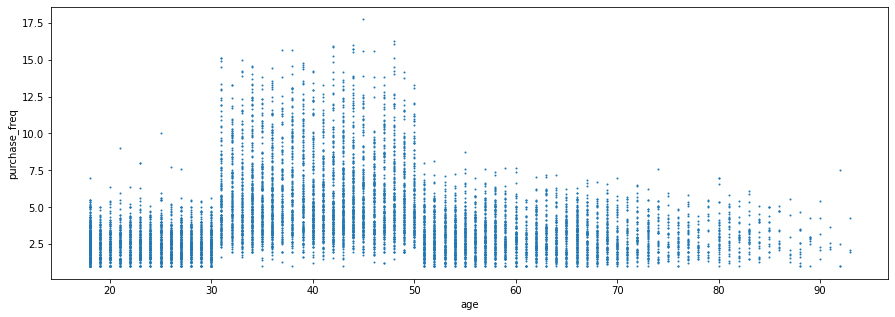

In [6]:
# Step 1. We start by collecting the relevant variables: age, month and number of purchases per customer
trs_age_freq = trs[['client_id','month','age','date']].groupby(['client_id','age','month']).count().reset_index()
trs_age_freq.columns = ['client_id','month','age','purchases']
trs_age_freq2 = trs_age_freq[['client_id','purchases']].groupby(['client_id']).mean().reset_index()
trs_age_freq2 = pd.merge(trs_age_freq2, trs_age_freq, how="inner", on='client_id')
trs_age_freq2.columns=['client_id','purchase_freq','age','drop1','drop2']
trs_age_freq2 = trs_age_freq2[['client_id','purchase_freq','age']].drop_duplicates()

# Step 2. Use the premade function to calculate the r_square correlation coefficient
r_square2 = st.pearsonr(trs_age_freq2["age"],trs_age_freq2["purchase_freq"])[0]

# Step 3. Evaluate
if (r_square2<=0.1):
    print("The r-squared value {0} is low, so we have a very bad correlation".format(round(r_square2,2)))
elif (r_square2<=0.25):
    print("The r-squared value {0} is weak, so we have almost no correlation".format(round(r_square2,2)))
elif (r_square2<=0.75):
    print("The r-squared value {0} is ambigous, so we have only a weak correlation".format(round(r_square2,2)))
elif (r_square2<=0.9):
    print("The r-squared value {0} is high, so we have a good indication of a correlation".format(round(r_square2,2)))
elif (r_square2>0.9):
    print("The r-squared value {0} is very high, so we have a strong indication of a correlation".format(round(r_square2,2)))
else:
    print("Error")

# Step 4. Visualize
trs_age_freq2[['age','purchase_freq']].plot.scatter(x='age',y='purchase_freq', s=1, figsize=(15,5))


<div class="alert alert-block alert-success">
<b>Result for Age and monthly purchase frequency</b><br> Once again we find a weak correlation between Age and Monthly Purchase Frequency. Our r-squared correlation test shows <b>-0.03</b> which is low. The scatter plot displays a similar chart as the previous question, clearly showing a lack of linearity. The same age group (31-50) that we found had a higher total spending habit also have a higher monthly purchase frequency.



#### Age and average basket size

Is there a correlation between age and the average basket size (in number of items)? Again we use r-squared and linear regression to look for correlation as we consider age and basket size as two quantitative variables.

The r-squared value -0.23 is low, so we have a very bad correlation


<AxesSubplot:xlabel='age', ylabel='basket_size_avg'>

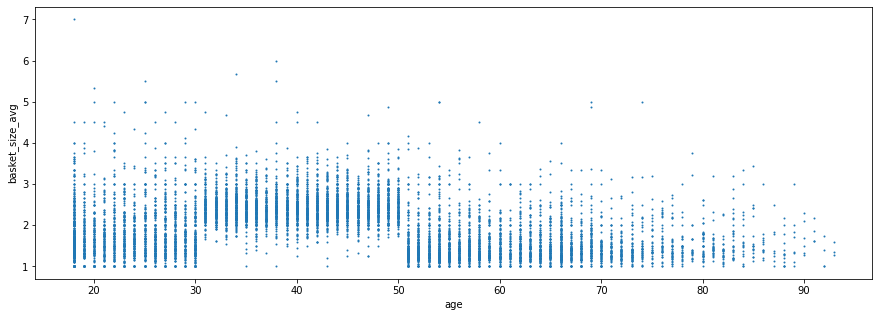

In [7]:
# Step 1. We start by collecting the relevant variables: client_id, age, session_id and number of purchases in that combination
trs_age_bask = trs[['client_id','session_id','age','date']].groupby(['client_id','session_id','age']).count().reset_index()
trs_age_bask.columns = ['client_id','session_id','age','basket_size']
trs_age_bask2 = trs_age_bask[['client_id','age','basket_size']].groupby(['client_id','age']).mean().reset_index()
trs_age_bask2.columns = ['client_id','age','basket_size_avg']

# Step 2. Use the premade function to calculate the r_square correlation coefficient
r_square3 = st.pearsonr(trs_age_bask2["age"],trs_age_bask2["basket_size_avg"])[0]

# Step 3. Evaluate
if (r_square3<=0.1):
    print("The r-squared value {0} is low, so we have a very bad correlation".format(round(r_square3,2)))
elif (r_square3<=0.25):
    print("The r-squared value {0} is weak, so we have almost no correlation".format(round(r_square3,2)))
elif (r_square3<=0.75):
    print("The r-squared value {0} is ambigous, so we have only a weak correlation".format(round(r_square3,2)))
elif (r_square3<=0.9):
    print("The r-squared value {0} is high, so we have a good indication of a correlation".format(round(r_square3,2)))
elif (r_square3>0.9):
    print("The r-squared value {0} is very high, so we have a strong indication of a correlation".format(round(r_square3,2)))
else:
    print("Error")

# Step 4. Visualize
trs_age_bask2[['age','basket_size_avg']].plot.scatter(x='age',y='basket_size_avg', s=1, figsize=(15,5))


<div class="alert alert-block alert-success">
<b>Result for Age and average basket size</b><br> The more compressed scatter plot conforms more to a linear curve than the previous checks, which is why we have a more pronounced r-square (towards -1) for this check <b>-0.23</b>. Same age group as before is also responsible for having larger basket sizes on checkout.



#### Age and purchased product category

<i>(Although not specified in the task, we interpret this as the correlation between the age of the customer and the AMOUNT OF PURCHASES by product category. This way we are answering the question if certain products are more appealing to different age groups. If we instead used the value of the purchases we would skew the results since not all products are worth the same)</i><br><br>
We are now evaluating age as quantitave and product category as qualitative, so we switch to eta-squared

The eta squared value 0.27 is ambigous, so we have only a weak correlation

Presenting below is a Box Plot for each category and the ages represented through their univariate properties (quartiles, mean, max, min)



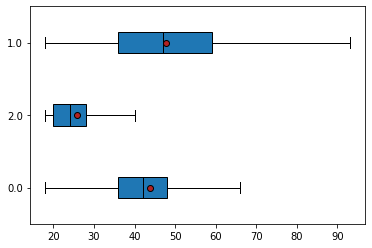

In [8]:
# Step 1. Target the interesting variables
X='age'
Y='categ'

eta2=eta_squared(trs[X],trs[Y])
if (eta2<=0.1):
    print("The eta squared value {0} is low, so we have a very bad correlation".format(round(eta2,2)))
elif (eta2<=0.25):
    print("The eta squared value {0} is weak, so we have almost no correlation".format(round(eta2,2)))
elif (eta2<=0.75):
    print("The eta squared value {0} is ambigous, so we have only a weak correlation".format(round(eta2,2)))
elif (eta2<=0.9):
    print("The eta squared value {0} is high, so we have a good indication of a correlation".format(round(eta2,2)))
elif (eta2>0.9):
    print("The eta squared value {0} is very high, so we have a strong indication of a correlation".format(round(eta2,2)))
else:
    print("Error")

categories = trs[Y].unique()
groups = []

for cat in categories:
    groups.append(trs[trs[Y]==cat][X])


medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
            
plt.boxplot(groups, labels=categories, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
print("\nPresenting below is a Box Plot for each category and the ages represented through their univariate properties (quartiles, mean, max, min)\n")
plt.show()


<div class="alert alert-block alert-success">
<b>Result for Age and purchased product category</b><br> The box plot show us that product 1 has the greatest age distribution, product category 2 heavily caters to the younger generation. The eta-square calculation results in 0.27 which means there is a very weak correlation between the categories.


As an alternative, we can use a chi-squared method to represent ages

Text(0.5, 1.0, 'Heatmap for age group spending vs product categories')

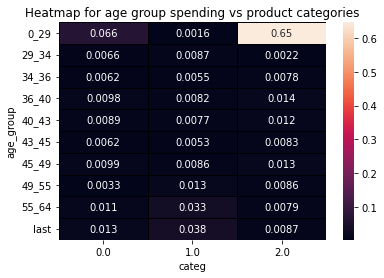

In [48]:
# Step 1. Target the interesting variables
X='age_group'
Y='categ'

age_brackets=([np.percentile(trs['age'].fillna(0),p) for p in np.array([i*10+10 for i in range(9)])])
age_group_dict={}
i=-1
previous='0'
for age in age_brackets:
    i+=1
    age_group_dict[age]="{0}_{1}".format(previous,str(round(age)))
    previous = str(round(age))

# Step 2. Convert age to age_group
trs['age_group'] = [age_to_agegroup(t, age_group_dict) for t in trs['age']] 
cont = trs[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]

n = len(trs)
independent = tx.dot(ty) / n
observed = cont.fillna(0) 
xi_ij = (observed-independent)**2/independent
xi_n = xi_ij.sum().sum()
heatmap_table = xi_ij/xi_n
#sns.heatmap(heatmap_table)
a = sns.heatmap(heatmap_table.iloc[:-1,:-1],annot=heatmap_table.iloc[:-1,:-1], linewidths=1, linecolor="k")
a.set_title("Heatmap for age group spending vs product categories")

<div class="alert alert-block alert-warning">
<b>Result for ALTERNATIVE Age and purchased product category</b><br>We see similar things when using the chi-squared method. Just as with the eta-squared method, we find that product 2 is MUCH more heavily are favored by the younger age group 0_29 (meaning 18-29 years old). There is a similar but weaker tendency on product 0.0 (favored by 0_29) and an inverse and equally weak relation for product category 1 towards the older age groups '55_64' (80-90% percentile) and 'last' (90%-100% percentile)

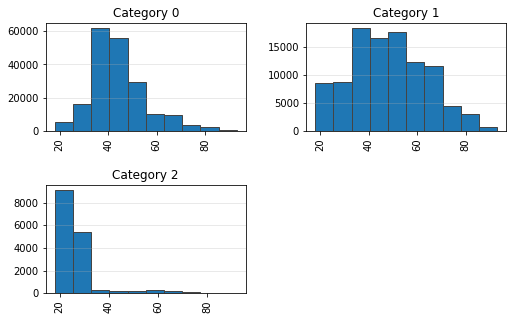

In [57]:
ax = trs.hist(column='age',by='categ', grid=True, figsize=(8,5), edgecolor='#444444') 
i = 0
for a in ax.flatten():
    a.set_title("Category {0}".format(i))
    i += 1
    a.grid(axis='y', alpha=0.35)